In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Model

In [ ]:
dataset=keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=dataset.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images=train_images/255.0
test_images=test_images/255.0

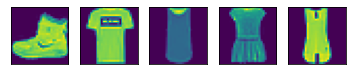

In [ ]:
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(train_images[i])
    plt.xticks([])
    plt.yticks([])

In [ ]:
train_images=train_images[...,tf.newaxis]
test_images=test_images[...,tf.newaxis]

In [ ]:
train_images.shape

(60000, 28, 28, 1)

In [ ]:
noise_factor=0.2

In [ ]:
noisy_train=train_images+noise_factor*tf.random.normal(shape=train_images.shape)
noisy_test=test_images+noise_factor*tf.random.normal(shape=test_images.shape)

In [ ]:
noisy_train=tf.clip_by_value(noisy_train,clip_value_min=0.0,clip_value_max=1.0)
noisy_test=tf.clip_by_value(noisy_test,clip_value_min=0.0,clip_value_max=1.0)

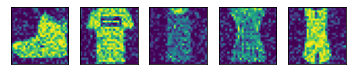

In [ ]:
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.imshow(tf.squeeze(noisy_train[i]))
  plt.xticks([])
  plt.yticks([])

In [ ]:
class denoise(Model):
  def __init__(self):
    super(denoise,self).__init__()
    self.encoder=keras.Sequential(
        [
         keras.Input(shape=(28,28,1)),
         keras.layers.Conv2D(16,(3,3),strides=2,padding='same',activation='relu'),
         layers.Conv2D(8,(3,3),strides=2,activation='relu',padding='same')
        ]
    )
    self.decoder=keras.Sequential([
      layers.Conv2DTranspose(8,kernel_size=3,strides=2,padding='same',activation='relu'),
      layers.Conv2DTranspose(16,kernel_size=3,strides=2,padding='same',activation='relu'),
      layers.Conv2D(1,padding='same',kernel_size=(3,3),activation='sigmoid')
    ])
  def call(self,x):
    encode=self.encoder(x)
    decode=self.decoder(encode)
    return decode

In [ ]:
denoise_auto=denoise()

In [ ]:
denoise_auto.compile(optimizer='adam',loss=keras.losses.MeanSquaredError())

In [ ]:
output=denoise_auto.fit(noisy_train, train_images, epochs=20, validation_data=(noisy_test, test_images) )

Epoch 1/20
1875/1875 [==============================] - 67s 35ms/step - loss: 0.0187 - val_loss: 0.0099
Epoch 2/20
1127/1875 [=================>............] - ETA: 24s - loss: 0.0095

KeyboardInterrupt: ignored

In [ ]:
output=denoise_auto.fit(noisy_train, train_images, epochs=20, validation_data=(noisy_test, test_images) )

Epoch 1/20
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0159 - val_loss: 0.0095
Epoch 2/20
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0087 - val_loss: 0.0083
Epoch 3/20
1875/1875 [==============================] - 76s 41ms/step - loss: 0.0080 - val_loss: 0.0079
Epoch 4/20
1875/1875 [==============================] - 76s 40ms/step - loss: 0.0077 - val_loss: 0.0077
Epoch 5/20
1875/1875 [==============================] - 74s 39ms/step - loss: 0.0075 - val_loss: 0.0074
Epoch 6/20
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0074 - val_loss: 0.0073
Epoch 7/20
1875/1875 [==============================] - 77s 41ms/step - loss: 0.0073 - val_loss: 0.0072
Epoch 8/20
1875/1875 [==============================] - 77s 41ms/step - loss: 0.0072 - val_loss: 0.0072
Epoch 9/20
1875/1875 [==============================] - 77s 41ms/step - loss: 0.0071 - val_loss: 0.0071
Epoch 10/20
1875/1875 [==============================] - 77s 41m

In [ ]:
predicted_imgs=denoise_auto.predict(noisy_train)

In [ ]:
predicted_imgs.shape

(60000, 28, 28, 1)

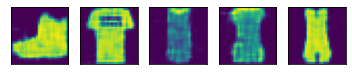

In [ ]:
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.imshow(tf.squeeze(predicted_imgs[i]))
  plt.xticks([])
  plt.yticks([])

In [ ]:
img=noisy_train[100]


In [ ]:
img1=tf.expand_dims(img,0)

In [ ]:
img1.shape

TensorShape([1, 28, 28, 1])

In [ ]:
prediction=denoise_auto.predict(img1)

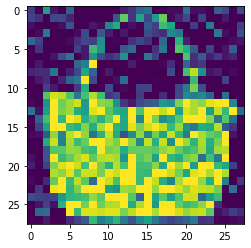

In [ ]:
plt.imshow(tf.squeeze(img))

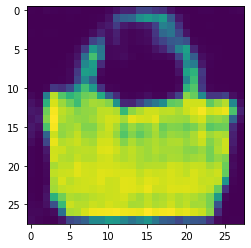

In [ ]:
plt.imshow(tf.squeeze(prediction))